# How do LLMs work?

This script has the goal to load GPTs from OpenAI via the API to look inside the "ChatGPT-Blackbox".

The OpenAI API key is stored safely in a hidden .env file --> insert your personal OpenAI API key there.

We can prompt ChatGPT then and receive a response. Contrary to a response on chatgpt.com we can modify the return of the API call and receive further details. Specifically, we are interested in the probability distributions of the generated tokens, which constitute the answer by ChatGPT. 

In [4]:
import openai
# import anthropic

# Configure API from dotenv import load_dotenv
import os
from dotenv import load_dotenv

# Load variables from .env file 
# --> in the hidden .env file you need to insert your API key
# Further adjustments to the path might be necessary
load_dotenv('/Users/alexanderbritz/Documents/Material_Library_icloud/AI/Playground/.env')  

openai_api_key = os.getenv('openai_api_key')
anthropic_api_key = os.getenv('anthropic_api_key')

In [6]:
# Create a prompt
prompt = "Tell a story, be creative, don't make it sound like any other story I've heard before. Don't start with `Once upon a time`..."

# Create client
client = openai.Client(api_key=openai_api_key)

# Call the OpenAI API
chat_completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    logprobs=True,
    top_logprobs=10,
    temperature=0,
    max_tokens=100,
    messages=[
        {"role": "user", "content": prompt}
    ]
)

# Print the response
chat_completion.choices[0].message.content

'In the heart of a bustling city, there was a small, unassuming bookstore tucked away on a quiet street. The shop was run by an eccentric old man named Mr. Finch, who was rumored to possess a collection of rare and mysterious books that held untold secrets.\n\nOne day, a young woman named Elara stumbled upon the bookstore while wandering the city streets. Intrigued by the dusty shelves and the smell of old paper, she decided to step inside. As she browsed the ais'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
In the heart of a bustling city, there was a small, unassuming bookstore tucked away on a quiet
street. The shop was run by an eccentric old man named Mr. Finch, who was rumored to possess a
collection of rare and mysterious books that held untold secrets.  One day, a young woman named
Elara stumbled upon the bookstore while wandering the city streets. Intrigued by the dusty shelves
and the smell of old paper, she decided to step inside. As she browsed the ais


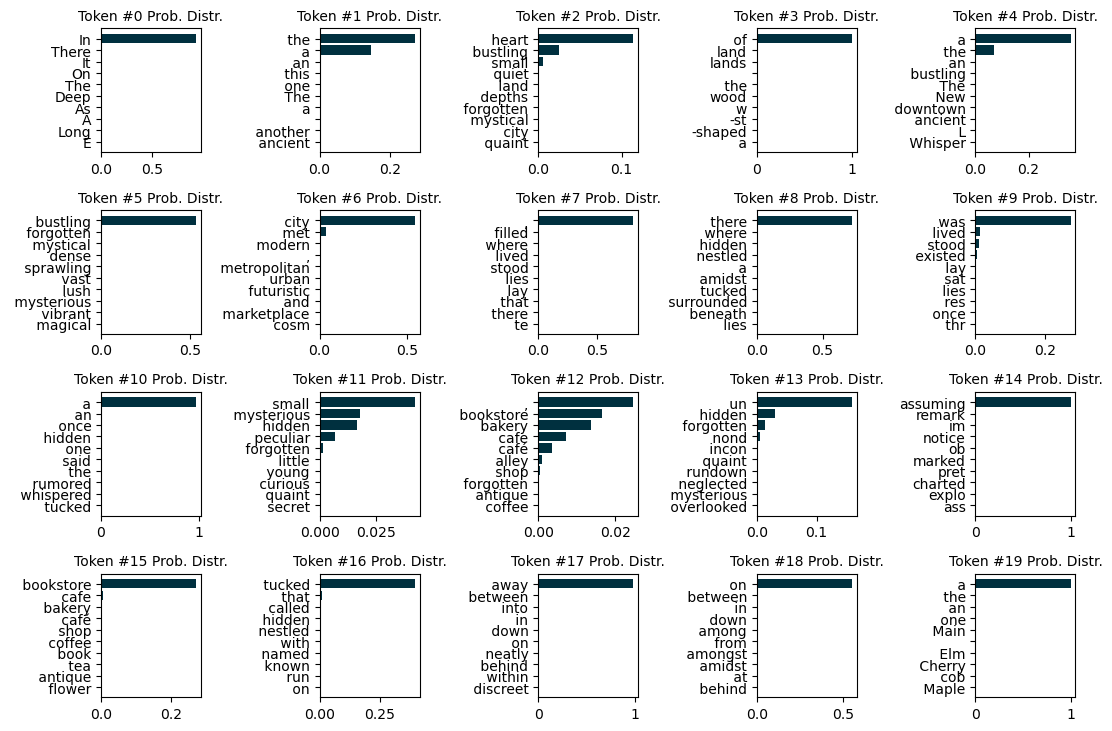

In [7]:
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(11, 9))

for i in range(20):
    plt.subplot(5,5,i+1)
    # Extract tokens and their log probabilities
    top_logprobs = chat_completion.choices[0].logprobs.content[i].top_logprobs

    # Get token names and their corresponding probabilities
    tokens = [logprob.token for logprob in top_logprobs]
    logprobs = [logprob.logprob for logprob in top_logprobs]
    probs = [10 ** logprob for logprob in logprobs]  # Convert logprobs to probabilities

    # Plot the distribution
    plt.barh(tokens, probs, color=(0,48/255,63/255))
    #plt.xlabel("Probability")
    #plt.ylabel("Tokens")
    plt.title(f"Token #{i} Prob. Distr.", fontsize=10)
    plt.gca().invert_yaxis()  # Invert to have the highest probability on top
    print(i)
plt.tight_layout()

print("\n".join(textwrap.wrap(chat_completion.choices[0].message.content, 100)))

# plt.show()
plt.savefig('prob_distribution.png',dpi = 300)